In [50]:
from scipy.io import loadmat
import scipy
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import matplotlib.image as mpimg

(-0.5, 499.5, 499.5, -0.5)

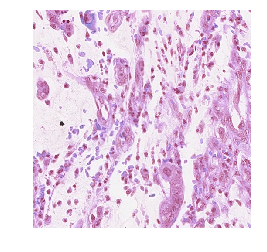

In [3]:
test_image = '/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img5/img5.bmp'
img = cv2.imread(test_image)
plt.imshow(img)
plt.axis('off')

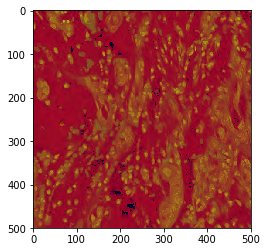

In [4]:
def random_HSV(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = 0.25*np.random.uniform()
    image[:,:,2] = image[:,:,2] * random_bright
    brighten_image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    return image
img_bright = random_HSV(img)
plt.imshow(img_bright)

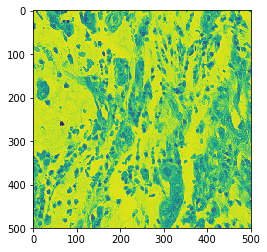

In [5]:
def color_to_gray(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image
img_gray = color_to_gray(img)
plt.imshow(img_gray)

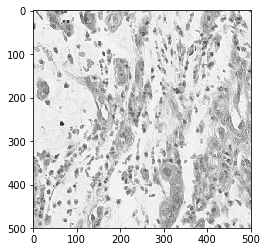

In [6]:
def remapping_gray_to_color(image):
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image
img_remapping_color = remapping_gray_to_color(img_gray)
plt.imshow(img_remapping_color)

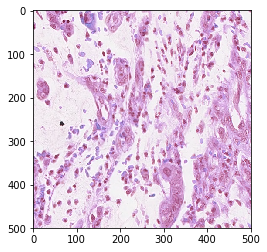

In [7]:
plt.imshow(img)

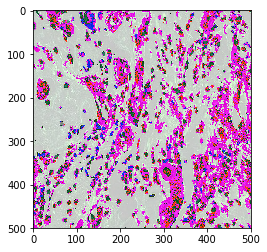

In [8]:
def gaussian_noise(image, alpha=3):
    std = img.std()
    dim = image.shape
    noisy_image = image + alpha*std*np.random.rand()
    return noisy_image
noisy_img = gaussian_noise(img)
plt.imshow(noisy_img)

In [9]:
import tensorflow as tf
from keras.preprocessing import image

/Users/yichen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


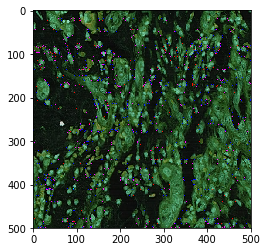

In [10]:
img_channel = image.random_channel_shift(img, intensity = 0.01)
plt.imshow(img_channel)

In [11]:
from scipy.io import loadmat
mask = np.zeros((500,500), dtype = np.int8)
path = '/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Classification/img5/img5_others.mat'
img_others = loadmat(path)
others_poly = img_others['detection']
others_poly

array([[142.50803448, 158.02972259],
       [162.9835959 , 101.22655218],
       [175.20288256,  96.27278732],
       [  7.76563025, 409.51585205],
       [320.51321004,  97.92404227],
       [340.16314399,  54.33091149],
       [352.05217966, 135.24240423]])

In [12]:
cv2.fillPoly(mask, [142.50803448, 158.02972259], 255, -1)
plt.imshow(mask)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2398: error: (-215) p.checkVector(2, 4) >= 0 in function fillPoly


In [31]:
main_path = '/Users/yichen/Desktop'
def dataset_path(num = 1):
    path1 = main_path + '/CRCHistoPhenotypes_2016_04_28'
    det_path = path1 + '/Detection'
    cls_path = path1 + '/Classfication'
    det_img_directory_path = det_path + '/img' + str(num)
    cls_img_directory_path = cls_path + '/img' + str(num)
    
    #path for the image
    img_path = det_img_directory_path + '/img' + str(num) + '.bmp'
    
    det_mat_path = det_path + '/img' + str(num) + '/img' + str(num) + '_detection.mat'
    epi_cls_mat_path = cls_path + '/img' + str(num) + '/img' + str(num) + '_epithelial.mat'
    fib_cls_mat_path = cls_path + '/img' + str(num) + '/img' + str(num) + '_fibroblast.mat'
    inflam_cls_mat_path = cls_path + '/img' + str(num) + '/img' + str(num) + '_inflammatory.mat'
    others_cls_mat_path = cls_path + '/img' + str(num) + '/img' + str(num) + '_others.mat'
    print(det_mat_path)
    return [img_path, det_mat_path], epi_cls_mat_path, 
            fib_cls_mat_path, inflam_cls_mat_path, others_cls_mat_path]

In [57]:
test_img, det_img, epi_mat, fib_mat, inflam_mat, others_mat= dataset_path(num = 4)[0], dataset_path(num = 4)[1]
img = cv2.imread(test_img)
#plt.imshow(img)
#det_img

/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img4/img4_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img4/img4_detection.mat


'/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img4/img4_detection.mat'

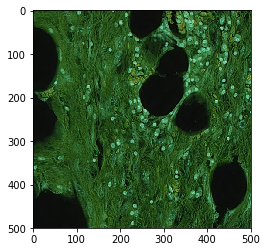

In [35]:
from skimage.morphology import convex_hull_image
from skimage import img_as_float
from skimage.util import invert
image = invert(img)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')

In [90]:
det_mat[1][1]

40.73309778611565

In [116]:
det_mat.shape

(154, 2)

In [135]:
def corr_to_mask(mat, path, title, order, shape = (500, 500)):
    mask = np.zeros((height, weight), dtype = np.int8)
    num, channel = mat.shape
    mask_batch = []
    for i in range(154):
        x = mat[i][0]
        y = mat[i][1]
        mask[np.round(x).astype(int), np.round(y).astype(int)] = 1
        mask_batch.append(mask)
        if not os.path.exists(path):
            os.makedirs(path)
        cv2.imwrite('{}/{}_img{}@{}.png'.format(path, title, order, str(i)), mask)
    return mask_batch
p = '/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection_augmented/img1'
a = corr_to_mask(det_mat, path = p, title = 'detec', order = 1)

In [125]:
det_mat = loadmat(det_img)['detection']
height = 500
weight = 500
counter = 0
#for i in det_mat:
mask = np.zeros((height, weight), dtype=np.float32)
mask[302.1234, 2.12314] = 1
plt.imshow(mask, cmap='gray')
    #counter += 1

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

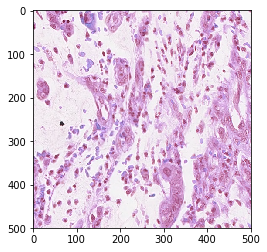

In [85]:
#np.random.seed(10121)
def image_augmentation(image_path, mask = None,
                        ratio_operations = 0.5,
                        save_image = False, addition_operatiosn = False):
    #import imgaug as ia
    #from imgaug import augmenters as iaa
    #without additional operations
    #according to the paper, operations such as shearing, fliping horizontal/vertical, 
    #rotating, zooming and channel shifting will be apply
    image = cv2.imread(image_path)
    sometimes = lambda aug:iaa.Sometimes(ratio_operations, aug)
    hor_flip_angle = np.random.uniform(0, 1)
    ver_flip_angle = np.random.uniform(0, 1)
    if addition_operatiosn is not None:
        seq = iaa.Sequential([
            iaa.SomeOf((0, 5),[
            iaa.Fliplr(hor_flip_angle),
            iaa.Flipud(ver_flip_angle),
            iaa.Affine(shear = (-16, 16)),
            iaa.Affine(scale = {'x': (1, 1.6), 'y': (1, 1.6)}),
            iaa.PerspectiveTransform(scale = (0.01, 0.1))
            ])
        ])
        
    image_aug = seq.augment_image(image)
    if mask is not None:
        mask_aug = seq.augment_image(mask)
        return image_aug, mask_aug
    else:
        return image_aug

aug_iii = image_augmentation(test_image)
plt.imshow(aug_iii)

In [62]:
data_path = '/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/'
def batch_augmentation(num_img = 101, num_new_img = 1000):
    counter = 0
    for i in range(1, num_img):
        if counter < num_new_img:
            img_path, det_mat_path = dataset_path(i)
            img_aug = image_augmentation(img_path)
            #print('this is img_aug: {}'.format(img_aug1))
            counter += 1
            save_dir_path = data_path + 'Detection_augmented/img' + str(i)
            #print(save_dir_path)
            save_img_path = save_dir_path + '/img' + str(counter) + '.png'
            if not os.path.isdir(save_dir_path):
                os.makedirs(save_dir_path)
                #print(save_dir_path)
            if not os.path.isfile(save_img_path):
                   # cv2.imshow('image', img_aug)
                cv2.imwrite(save_img_path, img_aug)

In [63]:
batch_augmentation()

/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img1/img1_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img2/img2_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img3/img3_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img4/img4_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img5/img5_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img6/img6_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img7/img7_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img8/img8_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img9/img9_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img10/img10_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_28/Detection/img11/img11_detection.mat
/Users/yichen/Desktop/CRCHistoPhenotypes_2016_04_2

In [66]:
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,255,0,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

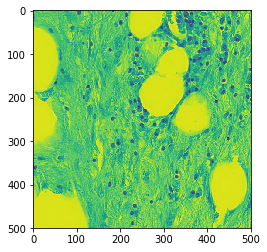

In [67]:
cv2.drawContours(imgray, contours, -1, (0, 255, 0), 3)
plt.imshow(imgray)

In [69]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

RuntimeError: sequence argument must have length equal to input rank

In [ ]:
def zoom_image(image, degree = 4, mask = None, corrdinates = None):
    from skimage.transform import pyramid_gaussian
    rows, cols, dim = image.shape
    zoom_img = image[rows//degree: - rows//degree, cols//degree: -cols//degree]
    #change all corrdinates according to the zoomming ratio
    #for corrdin in corrdinates:
    if corrdinates is not None:
        cor_change = rows//degree
        new_corrdinates = corrdinates - cor_change
        index = 0
        index_list = []
        for new_cor in new_corrdinates:
            if new_cor[0] < 0 or new_cor[1] < 0:
                index_list.append(index)
            index += 1
        new_corrdinates_clean = np.delete(new_corrdinates, index_list, 0)
        return zoom_img, new_corrdinates_clean
    elif mask is not None:
        zoom_mask = mask[rows//degree: - rows//degree, cols//degree: -cols//degree]
        return zoom_img, zoom_mask

img1_zoom, img1_zoom_detection = zoom_image(img, degree=4, mask = None, corrdinates=det_mat)
plt.imshow(img1_zoom)